In [11]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
misDatos = pd.read_csv('./Titanic-Dataset.csv')

In [13]:
misDatos.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
misDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
misDatos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

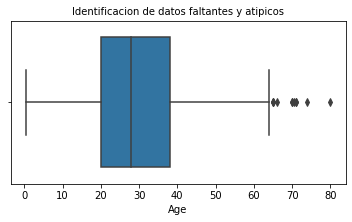

In [25]:
#identificacion de datos atipicos

plt.figure(figsize=(6,3))
sns.boxplot(x=misDatos['Age'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

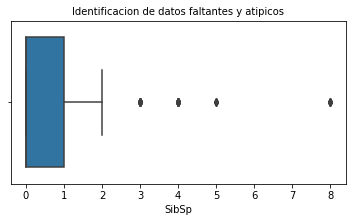

In [26]:
#identificacion de datos atipicos

plt.figure(figsize=(6,3))
sns.boxplot(x=misDatos['SibSp'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

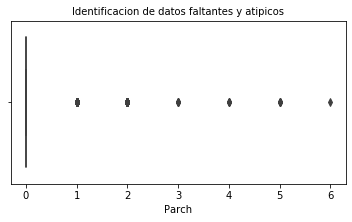

In [27]:
#identificacion de datos atipicos

plt.figure(figsize=(6,3))
sns.boxplot(x=misDatos['Parch'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

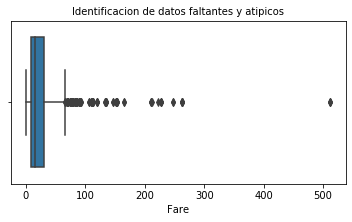

In [28]:
#identificacion de datos atipicos

plt.figure(figsize=(6,3))
sns.boxplot(x=misDatos['Fare'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

In [42]:
print("Cantidad de registros con cero en Clase social: ",misDatos['Pclass'].isin([0]).sum())
print("Cantidad de registros con cero en el nombre: ",misDatos['Name'].isin([0]).sum())
print("Cantidad de registros con cero en el genero: ",misDatos['Sex'].isin([0]).sum())
print("Cantidad de registros con cero en Edad: ",misDatos['Age'].isin([0]).sum())
print("Cantidad de registros con cero en Acompañantes: ",misDatos['SibSp'].isin([0]).sum())
print("Cantidad de registros con cero en Padres o hijos: ",misDatos['Parch'].isin([0]).sum())
print("Cantidad de registros con cero en el numero de ticket: ",misDatos['Ticket'].isin([0]).sum())
print("Cantidad de registros con cero en el costo del ticket: ",misDatos['Fare'].isin([0]).sum())
print("Cantidad de registros con cero en el numero de camarote: ",misDatos['Cabin'].isin([0]).sum())
print("Cantidad de registros con cero en el puerto de embarque: ",misDatos['Embarked'].isin([0]).sum())

Cantidad de registros con cero en Clase social:  0
Cantidad de registros con cero en el nombre:  0
Cantidad de registros con cero en el genero:  0
Cantidad de registros con cero en Edad:  0
Cantidad de registros con cero en Acompañantes:  608
Cantidad de registros con cero en Padres o hijos:  678
Cantidad de registros con cero en el numero de ticket:  0
Cantidad de registros con cero en el costo del ticket:  15
Cantidad de registros con cero en el numero de camarote:  0
Cantidad de registros con cero en el puerto de embarque:  0


In [44]:
#Reemplazar todos los ceros con el valor promedio de la columna

misDatos['Fare']=misDatos['Fare'].replace(0,misDatos['Fare'].mean())

# 3. Seleccionar las caracteristicas de interes para entrenar el modelo

-Sobrevivio: si la persona tiene (0= no sobrevivio - 1= si sobrevivio)

In [45]:
#Total de personas que sobrevivieron

misDatos['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [46]:
misDatos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


# 4.Dividir el dataset en train y test para evaluar correctamente el modelo

In [48]:
X = misDatos.drop('Survived',axis=1)
Y = misDatos['Survived']

X_train, X_test, Y_train, Y_test, = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [49]:
print(X_train)

     PassengerId  Pclass                                               Name  \
671          672       1                             Davidson, Mr. Thornton   
417          418       2                      Silven, Miss. Lyyli Karoliina   
634          635       3                                 Skoog, Miss. Mabel   
323          324       2  Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...   
379          380       3                        Gustafsson, Mr. Karl Gideon   
..           ...     ...                                                ...   
131          132       3                     Coelho, Mr. Domingos Fernandeo   
490          491       3               Hagland, Mr. Konrad Mathias Reiersen   
528          529       3                          Salonen, Mr. Johan Werner   
48            49       3                                Samaan, Mr. Youssef   
80            81       3                               Waelens, Mr. Achille   

        Sex   Age  SibSp  Parch              Ticket

# 5.Entrenar el modelo configurando los diferentes hiperparametros

In [50]:
# Construir el modelo de regresion logistica

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train, Y_train)

#crear el modelo de prediccion

Prediccion = modelo_regresion.predict(X_test)

ValueError: could not convert string to float: 'S'